In [17]:
import pandas as pd                  
from matplotlib import pyplot as plt 
import seaborn as sns


from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

In [18]:
# crop_yield -> ton per hectare

df = pd.read_csv('dataset\crop_yield_data.csv')
df

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
0,1626,9,636,11,1006,404
1,1959,9,73,11,112,115
2,1360,1,352,5,702,231
3,1794,2,948,7,299,537
4,1630,5,884,5,2733,554
...,...,...,...,...,...,...
2995,1483,9,78,12,2739,155
2996,804,9,481,4,1898,319
2997,870,1,113,7,2282,129
2998,1352,6,767,11,2901,493


In [19]:
df.shape

(3000, 6)

In [20]:
df.describe()

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1263.095000,5.506667,498.801000,7.995333,1549.450333,328.099000
std,432.371756,2.855172,287.122742,2.621501,814.326919,145.036503
min,500.000000,1.000000,10.000000,4.000000,100.000000,46.000000
25%,896.000000,3.000000,242.000000,6.000000,869.750000,199.000000
50%,1277.000000,6.000000,505.000000,8.000000,1542.000000,332.000000
75%,1636.000000,8.000000,741.000000,10.000000,2225.000000,455.000000
max,2000.000000,10.000000,1000.000000,12.000000,3000.000000,628.000000


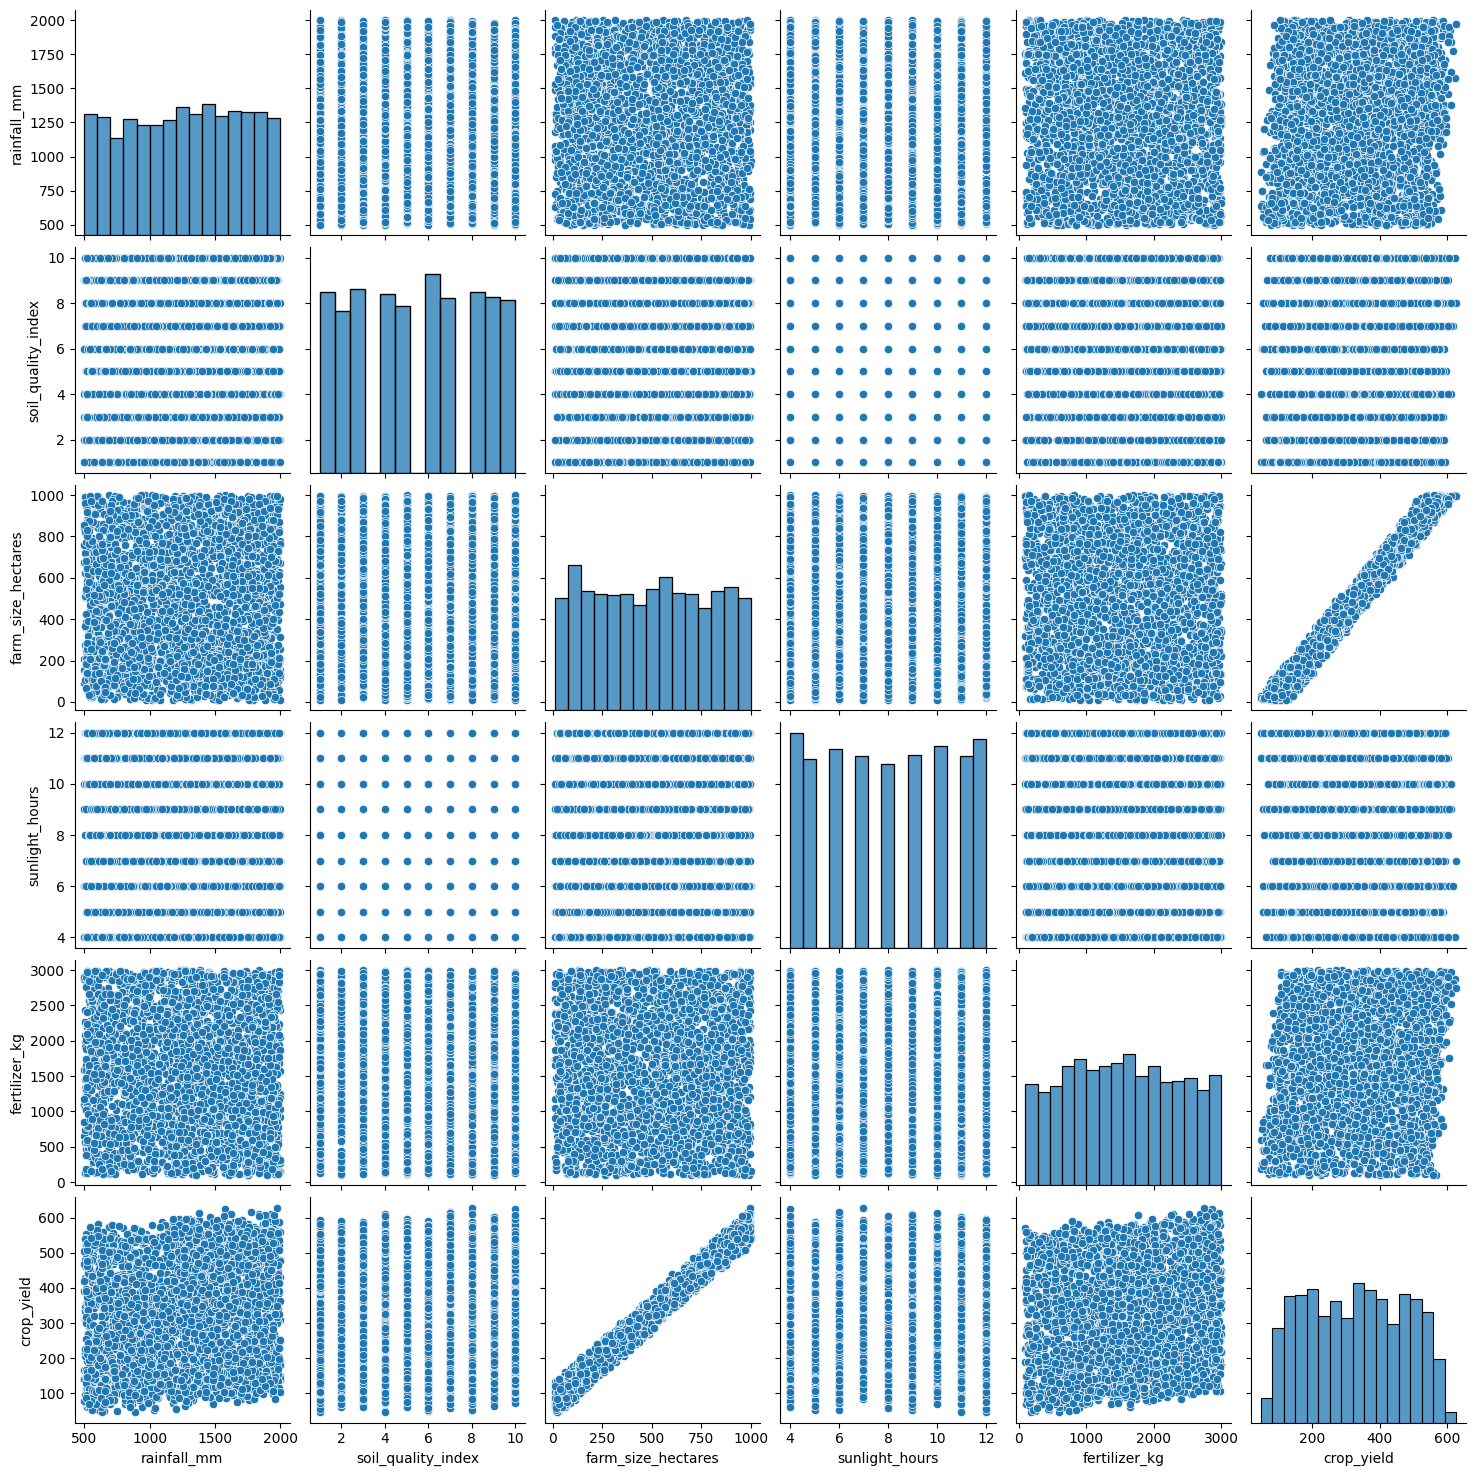

In [21]:

sns.pairplot(df) #grafico de pares de variaveis
plt.show()  

In [22]:
df.corr()

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
rainfall_mm,1.000000,-0.022198,0.001127,-0.005250,-0.029317,0.086339
soil_quality_index,-0.022198,1.000000,0.005829,0.002187,0.007254,0.043990
farm_size_hectares,0.001127,0.005829,1.000000,-0.010054,-0.008032,0.989201
sunlight_hours,-0.005250,0.002187,-0.010054,1.000000,0.016289,-0.006792
fertilizer_kg,-0.029317,0.007254,-0.008032,0.016289,1.000000,0.102023
crop_yield,0.086339,0.043990,0.989201,-0.006792,0.102023,1.000000


In [23]:
df.isnull().sum()

rainfall_mm           0
soil_quality_index    0
farm_size_hectares    0
sunlight_hours        0
fertilizer_kg         0
crop_yield            0
dtype: int64

In [28]:
from sklearn.model_selection import train_test_split


x = df[['rainfall_mm', 'soil_quality_index', 'farm_size_hectares',
       'sunlight_hours', 'fertilizer_kg']]
y = df['crop_yield']

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    train_size=0.75,
                                                    random_state=42)

In [31]:
randon_forest_model = RandomForestRegressor(n_estimators=1000, 
                                 max_depth=5,
                                 random_state=42,
                                )

randon_forest_model.fit(x_train, y_train)


randon_forest_predicted = randon_forest_model.predict(x_test)

In [32]:
randon_forest_score = randon_forest_model.score(x_test, y_test)

randon_forest_score

0.9892668313770813

In [50]:
import numpy as np

test_data = np.array([[1200, 7, 50, 8, 1500]])

predict = randon_forest_model.predict(test_data)

print("Previsão do rendimento da colheita:", predict[0])

Previsão do rendimento da colheita: 102.40758337063036


c:\Users\wagne\AppData\Local\pypoetry\Cache\virtualenvs\farmyieldprediction-mlflow-bRIfbDex-py3.11\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
